## IMPORT


In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


## DATASET LOADS


In [3]:
data = "./raw_data/"
artists = pd.read_csv(f'{data}raw_artists.csv', sep=';', index_col=0)
tracks = pd.read_csv(f'{data}raw_tracks.csv', sep=',', index_col=0)

## ARTISTS FEATURE STUDY


In [4]:
# Visualizzare le prime righe del dataset
artists.head()

,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
id_author,,,,,,,,,,,,,
ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Dataset dimensions:", artists.shape)
print("\nColumns names:")
print(artists.columns.tolist())

Dataset dimensions: (104, 13)

Columns names:
['name', 'gender', 'birth_date', 'birth_place', 'nationality', 'description', 'active_start', 'active_end', 'province', 'region', 'country', 'latitude', 'longitude']


In [6]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          104 non-null    object 
 1   gender        104 non-null    object 
 2   birth_date    73 non-null     object 
 3   birth_place   72 non-null     object 
 4   nationality   71 non-null     object 
 5   description   86 non-null     object 
 6   active_start  50 non-null     object 
 7   active_end    0 non-null      float64
 8   province      70 non-null     object 
 9   region        68 non-null     object 
 10  country       70 non-null     object 
 11  latitude      72 non-null     float64
 12  longitude     72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 11.4+ KB


In [7]:
artists.describe(include='all')

,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
count,104,104,73,72,71,86,50,0.0,70,68,70,72.000000,72.000000
unique,104,2,73,40,2,69,24,NaN,26,13,1,NaN,NaN
top,99 posse,M,1990-07-11,Milano,Italia,gruppo musicale italiano,1996-01-01,NaN,Milano,Lombardia,Italia,NaN,NaN
freq,1,87,1,15,70,6,6,NaN,19,24,70,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.591374,11.060876
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.248674,2.591871
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.747452,7.525403
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.577547,9.189635
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.067755,9.917118
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.464194,12.482932


In [8]:
# Informazioni generali sul dataset
summary = pd.DataFrame({
    'dtype': artists.dtypes,
    'unique_values': artists.nunique(),
    'missing_values': artists.isna().sum(),
    'missing_percent': artists.isna().mean() * 100
})
# Ordina il riepilogo per numero decrescente di valori mancanti
summary = summary.sort_values(by='missing_values', ascending=False)
print(summary)

                dtype  unique_values  missing_values  missing_percent
active_end    float64              0             104       100.000000
active_start   object             24              54        51.923077
region         object             13              36        34.615385
province       object             26              34        32.692308
country        object              1              34        32.692308
nationality    object              2              33        31.730769
latitude      float64             40              32        30.769231
longitude     float64             40              32        30.769231
birth_place    object             40              32        30.769231
birth_date     object             73              31        29.807692
description    object             69              18        17.307692
gender         object              2               0         0.000000
name           object            104               0         0.000000


In [9]:
# Verifica duplicati
print("Numero di duplicati nel dataset:", artists.duplicated().sum())
print("Numero di nomi duplicati:", artists['name'].duplicated().sum())

Numero di duplicati nel dataset: 0
Numero di nomi duplicati: 0


### ACTIVE_START


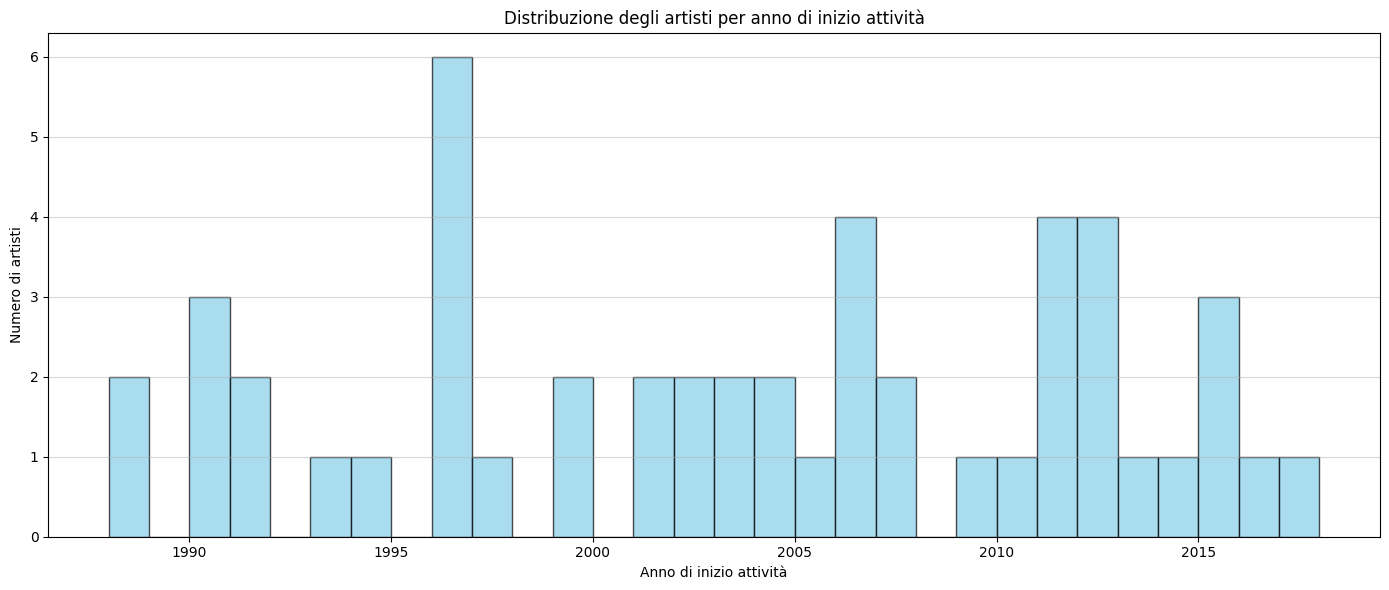


Statistiche anno di inizio attività:
count      50.000000
mean     2003.320000
std         8.546249
min      1988.000000
25%      1996.000000
50%      2004.000000
75%      2011.000000
max      2018.000000
Name: active_start_year, dtype: float64


In [10]:
# Analisi dell'anno di inizio attività
# Convertire active_start in datetime
artists['active_start_year'] = pd.to_datetime(artists['active_start'], errors='coerce').dt.year

plt.figure(figsize=(14, 6))
active_years = artists['active_start_year'].dropna()
plt.hist(active_years, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Anno di inizio attività')
plt.ylabel('Numero di artisti')
plt.title('Distribuzione degli artisti per anno di inizio attività')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

print("\nStatistiche anno di inizio attività:")
print(active_years.describe())

### ACTIVE_END

No data on this column so we drop it.


### NATIONALITIES


In [11]:
print("Artists nationalities:")
print(artists["nationality"].unique())

nationality_counts = artists["nationality"].value_counts(dropna=False)

print(nationality_counts)


Artists nationalities:
[nan 'Italia' 'Argentina']
nationality
Italia       70
NaN          33
Argentina     1
Name: count, dtype: int64


### GENDER


In [12]:
print(artists["gender"].unique())
gender_count = artists["gender"].value_counts(dropna=False)
print(gender_count)
for gender,count in gender_count.items():
    print(f"{gender} : {(count / artists.shape[0]) * 100:.2f}%")
print("no missing values for gender")


['M' 'F']
gender
M    87
F    17
Name: count, dtype: int64
M : 83.65%
F : 16.35%
no missing values for gender


### BIRTH PLACE


In [13]:
# Combined output: unique values, counts and percentages in one print
birth_place_values = artists['birth_place']
unique_places = birth_place_values.dropna().unique()
birth_place_count = birth_place_values.value_counts(dropna=False)
total = artists.shape[0]
lines = []
lines.append('Unique birth places:')
lines.append(str(list(unique_places)))
lines.append('\nCounts and percentages:')
for place, count in birth_place_count.items():
    pct = (count / total) * 100
    lines.append(f'{place} : {count} ({pct:.2f}%)')
print('\n'.join(lines))

Unique birth places:
['Verona', 'Rho', 'Singapore', 'Milano', 'Sternatia', 'Salerno', 'Almería', 'Avellino', 'Nocera Inferiore', 'La Spezia', 'Bologna', 'Vimercate', 'Alpignano', 'Senigallia', 'Brescia', 'Torino', 'Roma', 'Napoli', 'Olbia', 'Firenze', 'Scampia', 'Vicenza', 'Grottaglie', 'Nicosia', 'Gallarate', 'Treviso', 'Desenzano del Garda', 'San Benedetto del Tronto', 'Scafati', 'Pieve Emanuele', 'San Siro', 'Grugliasco', 'Lodi', 'Sesto San Giovanni', 'Buenos Aires', 'Genova', 'Fiumicino', 'Padova', 'Reggio Calabria', 'Cagliari']

Counts and percentages:
nan : 32 (30.77%)
Milano : 15 (14.42%)
Roma : 7 (6.73%)
Torino : 4 (3.85%)
Napoli : 3 (2.88%)
Olbia : 3 (2.88%)
Vicenza : 3 (2.88%)
Avellino : 2 (1.92%)
Salerno : 2 (1.92%)
Senigallia : 2 (1.92%)
Almería : 1 (0.96%)
Rho : 1 (0.96%)
Singapore : 1 (0.96%)
Verona : 1 (0.96%)
Sternatia : 1 (0.96%)
Nocera Inferiore : 1 (0.96%)
La Spezia : 1 (0.96%)
Brescia : 1 (0.96%)
Alpignano : 1 (0.96%)
Bologna : 1 (0.96%)
Vimercate : 1 (0.96%)
Firenz

### BIRTH DATE


In [14]:
artists["birth_date"].unique()

print(artists["birth_date"].unique())

birth_date_count = artists["birth_date"].value_counts(dropna=False)

print(birth_date_count)

for place,count in birth_date_count.items():
    print(f"{place} : {(count / artists.shape[0]) * 100:.2f}%")

# shiva birth date 1999-08-27

[nan '1990-07-11' '1975-08-08' '1983-02-05' '1973-08-03' '1973-10-09'
 '1998-04-20' '1998-11-07' '1982-12-21' '1983-07-11' '1993-11-05'
 '1975-05-15' '1997-05-16' '1989-11-14' '1985-12-13' '1985-03-16'
 '1993-11-29' '1976-10-17' '1989-10-15' '1989-12-27' '1969-08-18'
 '1989-11-03' '1988-11-04' '2000-03-23' '1993-05-21' '1982-04-01'
 '1979-03-30' '1990-05-14' '1997-01-01' '1979-10-02' '1972-08-05'
 '1982-12-20' '1979-02-25' '1970-06-20' '1994-08-22' '1981-01-07'
 '2002-01-16' '1988-07-25' '1992-09-12' '1991-08-16' '1979-05-22'
 '1993-11-30' '1976-09-11' '1986-12-01' '1991-11-19' '1986-10-17'
 '1967-10-07' '1980-12-29' '1997-07-22' '1993-02-11' '1979-12-15'
 '2001-02-19' '1973-04-26' '1989-07-19' '1994-04-19' '1994-11-21'
 '2002-04-29' '1998-01-30' '1989-07-20' '1995-09-18' '1984-06-29'
 '1992-12-07' '1980-11-17' '1987-12-10'
 'http://www.wikidata.org/.well-known/genid/4111f32c49a23235b2e902dc8621d27c'
 '1987-01-24' '1994-02-21' '2001-03-17' '1999-09-26' '1991-05-17'
 '1975-09-06' '1979-

### PROVINCE


In [15]:
# Combined output: unique provinces, counts and percentages in one print
province_values = artists['province']
unique_provinces = province_values.dropna().unique()
province_count = province_values.value_counts(dropna=False)
total = artists.shape[0]
lines = []
lines.append('Unique provinces:')
lines.append(str(list(unique_provinces)))
lines.append('\nCounts and percentages:')
for place, count in province_count.items():
    pct = (count / total) * 100
    lines.append(f'{place} : {count} ({pct:.2f}%)')
print('\n'.join(lines))

Unique provinces:
['Verona', 'Milano', 'Lecce', 'Salerno', 'Genova', 'Avellino', 'La Spezia', 'Bologna', 'Monza e della Brianza', 'Torino', 'Ancona', 'Brescia', 'Roma', 'Napoli', 'Gallura', 'Firenze', 'Vicenza', 'Taranto', 'Enna', 'Varese', 'Treviso', 'Ascoli Piceno', 'Lodi', 'Padova', 'Reggio Calabria', 'Cagliari']

Counts and percentages:
nan : 34 (32.69%)
Milano : 19 (18.27%)
Roma : 8 (7.69%)
Torino : 6 (5.77%)
Salerno : 4 (3.85%)
Napoli : 4 (3.85%)
Vicenza : 3 (2.88%)
Gallura : 3 (2.88%)
Avellino : 2 (1.92%)
Genova : 2 (1.92%)
Ancona : 2 (1.92%)
Brescia : 2 (1.92%)
Monza e della Brianza : 1 (0.96%)
La Spezia : 1 (0.96%)
Lecce : 1 (0.96%)
Verona : 1 (0.96%)
Bologna : 1 (0.96%)
Firenze : 1 (0.96%)
Taranto : 1 (0.96%)
Enna : 1 (0.96%)
Varese : 1 (0.96%)
Treviso : 1 (0.96%)
Ascoli Piceno : 1 (0.96%)
Lodi : 1 (0.96%)
Padova : 1 (0.96%)
Reggio Calabria : 1 (0.96%)
Cagliari : 1 (0.96%)


### REGION


In [16]:
# Combined output: unique regions, counts and percentages in one print
region_values = artists['region']
unique_regions = region_values.dropna().unique()
region_count = region_values.value_counts(dropna=False)
total = artists.shape[0]
lines = []
lines.append('Unique regions:')
lines.append(str(list(unique_regions)))
lines.append('\nCounts and percentages:')
for place, count in region_count.items():
    pct = (count / total) * 100
    lines.append(f'{place} : {count} ({pct:.2f}%)')
print('\n'.join(lines))

Unique regions:
['Veneto', 'Lombardia', 'Puglia', 'Campania', 'Liguria', 'Emilia-Romagna', 'Piemonte', 'Lazio', 'Sardegna', 'Toscana', 'Sicilia', 'Marche', 'Calabria']

Counts and percentages:
nan : 36 (34.62%)
Lombardia : 24 (23.08%)
Campania : 10 (9.62%)
Lazio : 8 (7.69%)
Piemonte : 6 (5.77%)
Veneto : 6 (5.77%)
Sardegna : 4 (3.85%)
Liguria : 3 (2.88%)
Puglia : 2 (1.92%)
Emilia-Romagna : 1 (0.96%)
Toscana : 1 (0.96%)
Sicilia : 1 (0.96%)
Marche : 1 (0.96%)
Calabria : 1 (0.96%)


### LATITUDE AND LONGITUDE

These features don't bring any meaningfull information so they are dropped


### MISSING VALUES


In [17]:
# Analisi dei valori mancanti
print("Valori mancanti per colonna:")
missing_values = artists.isnull().sum()
missing_percentage = (missing_values / len(artists)) * 100
missing_df = pd.DataFrame({
    'Colonna': missing_values.index,
    'Valori Mancanti': missing_values.values,
    'Percentuale (%)': missing_percentage.values
})
missing_df = missing_df[missing_df['Valori Mancanti'] > 0].sort_values('Valori Mancanti', ascending=False)
print(missing_df.to_string(index=False))

Valori mancanti per colonna:
          Colonna  Valori Mancanti  Percentuale (%)
       active_end              104       100.000000
     active_start               54        51.923077
active_start_year               54        51.923077
           region               36        34.615385
         province               34        32.692308
          country               34        32.692308
      nationality               33        31.730769
      birth_place               32        30.769231
         latitude               32        30.769231
        longitude               32        30.769231
       birth_date               31        29.807692
      description               18        17.307692


C:\Users\miche\AppData\Local\Temp\ipykernel_5944\3013097339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')


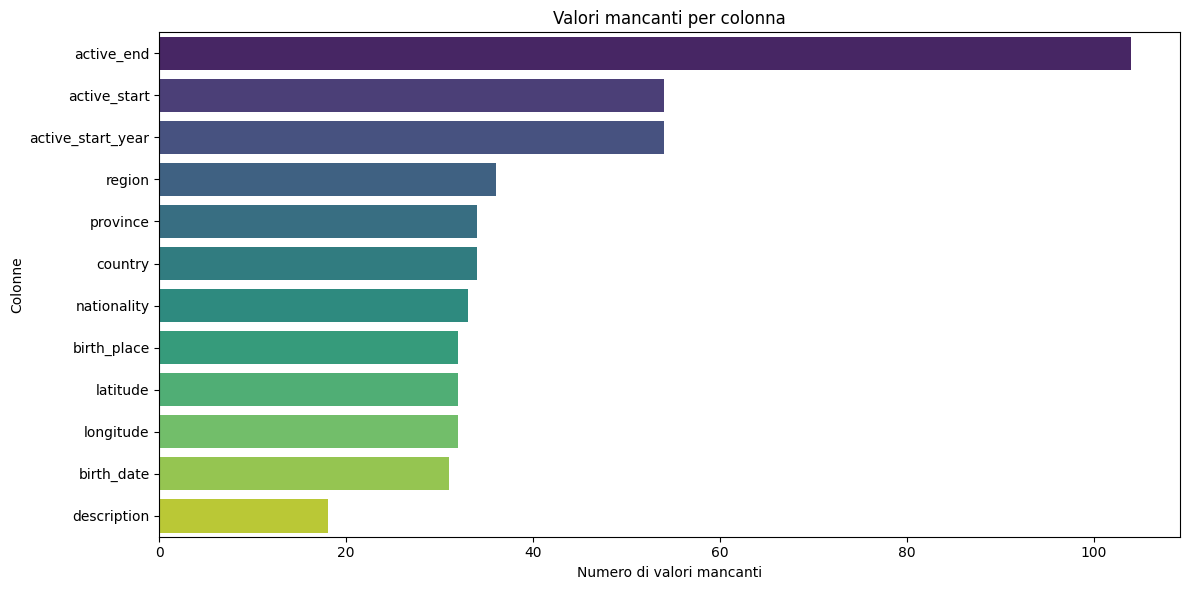

In [18]:
# Visualizzazione valori mancanti
plt.figure(figsize=(12, 6))
missing_data = artists.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.xlabel('Numero di valori mancanti')
plt.ylabel('Colonne')
plt.title('Valori mancanti per colonna')
plt.tight_layout()
plt.show()

In [19]:
# Statistiche descrittive
artists.describe(include='all')

,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,active_start_year
count,104,104,73,72,71,86,50,0.0,70,68,70,72.000000,72.000000,50.000000
unique,104,2,73,40,2,69,24,NaN,26,13,1,NaN,NaN,NaN
top,99 posse,M,1990-07-11,Milano,Italia,gruppo musicale italiano,1996-01-01,NaN,Milano,Lombardia,Italia,NaN,NaN,NaN
freq,1,87,1,15,70,6,6,NaN,19,24,70,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.591374,11.060876,2003.320000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.248674,2.591871,8.546249
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.747452,7.525403,1988.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.577547,9.189635,1996.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.067755,9.917118,2004.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.464194,12.482932,2011.000000


## TRACKS FEATURE STUDY


In [20]:
# Visualizzare le prime righe del dataset
tracks.head()

,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,swear_IT,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
id,,,,,,,,,,,,,,,,,,,,,
TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,13,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\r\nBdope, chiama due b—\r\n\r\nMi can...",False
TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,9,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\r\n(Brr-poh)\r\n\r\nT...",False
TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,16,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\r\nYeah, yeah, yeah-yeah\r\nBdope, chiam...",False
TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,8,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,1,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\r\n\r\nVuole solo me, non fare la...",False


In [21]:
print("Dataset dimensions:", tracks.shape)
print("\nColumns names:")
print(tracks.columns.tolist())

Dataset dimensions: (11166, 44)

Columns names:
['id_artist', 'name_artist', 'full_title', 'title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image', 'id_album', 'lyrics', 'modified_popularity']


In [22]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, TR934808 to TR552777
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_artist             11166 non-null  object 
 1   name_artist           11166 non-null  object 
 2   full_title            11166 non-null  object 
 3   title                 11166 non-null  object 
 4   featured_artists      3517 non-null   object 
 5   primary_artist        11166 non-null  object 
 6   language              11061 non-null  object 
 7   album                 9652 non-null   object 
 8   stats_pageviews       4642 non-null   float64
 9   swear_IT              11166 non-null  int64  
 10  swear_EN              11166 non-null  int64  
 11  swear_IT_words        11166 non-null  object 
 12  swear_EN_words        11166 non-null  object 
 13  year                  10766 non-null  object 
 14  month                 9969 non-null   float64
 15  day           

In [23]:
tracks.describe(include='all')

,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,swear_IT,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
count,11166,11166,11166,11166,3517,11166,11061,9652,4.642000e+03,11166.000000,...,11088,11088.000000,11088.000000,1.108800e+04,11088,11164,11088,11088,11163,11166
unique,104,104,11164,10521,1740,104,35,890,NaN,NaN,...,3,NaN,NaN,NaN,2,170,2486,3061,11153,2
top,ART91352277,Mondo Marcio,​sentimi by Madame,Intro,Guè,Mondo Marcio,it,Rimo Da Quando,NaN,NaN,...,album,NaN,NaN,NaN,True,34.0,https://i.scdn.co/image/ab67616d0000b273d6cdd0...,ALB441104,Qua si affacciano di sotto appena usciamo dal ...,False
freq,353,353,2,36,64,353,9352,47,NaN,NaN,...,9353,NaN,NaN,NaN,5629,217,132,48,2,11088
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.699365e+04,2.343006,...,NaN,1.016685,6.859127,2.035293e+05,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.840656e+04,3.704831,...,NaN,0.138903,5.191472,8.825641e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.006000e+03,0.000000,...,NaN,1.000000,1.000000,1.142600e+04,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.642250e+03,0.000000,...,NaN,1.000000,2.000000,1.701310e+05,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.909950e+04,1.000000,...,NaN,1.000000,6.000000,1.966725e+05,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.201175e+04,3.000000,...,NaN,1.000000,10.000000,2.271840e+05,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Verifica duplicati
print("Numero di duplicati nel dataset:", tracks.duplicated().sum())
print("Numero di titoli completi duplicati:", tracks['full_title'].duplicated().sum())
print("Numero di titoli duplicati:", tracks['title'].duplicated().sum())

Numero di duplicati nel dataset: 0
Numero di titoli completi duplicati: 2
Numero di titoli duplicati: 645


In [25]:
# numero di tracce per artista
tracks_per_artist = tracks['id_artist'].value_counts()
print("\nStatistiche sul numero di tracce per artista:")
print(tracks_per_artist.describe())


Statistiche sul numero di tracce per artista:
count    104.000000
mean     107.365385
std       74.369591
min        2.000000
25%       55.000000
50%       97.000000
75%      149.500000
max      353.000000
Name: count, dtype: float64


### MISSING VALUES


In [26]:
summary = pd.DataFrame({
    'dtype': tracks.dtypes,
    'unique_values': tracks.nunique(),
    'missing_values': tracks.isna().sum(),
    'missing_percent': tracks.isna().mean() * 100
})
# Ordina il riepilogo per numero decrescente di valori mancanti
summary = summary.sort_values(by='missing_values', ascending=False)
print(summary)

                        dtype  unique_values  missing_values  missing_percent
featured_artists       object           1740            7649        68.502597
stats_pageviews       float64           4422            6524        58.427369
album                  object            890            1514        13.559018
day                   float64             31            1323        11.848469
month                 float64             12            1197        10.720043
year                   object            195             400         3.582303
language               object             35             105         0.940355
id_album               object           3061              78         0.698549
album_image            object           2486              78         0.698549
album_type             object              3              78         0.698549
album_release_date     object           1390              78         0.698549
album_name             object           2421              78    

C:\Users\miche\AppData\Local\Temp\ipykernel_5944\4141511518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')


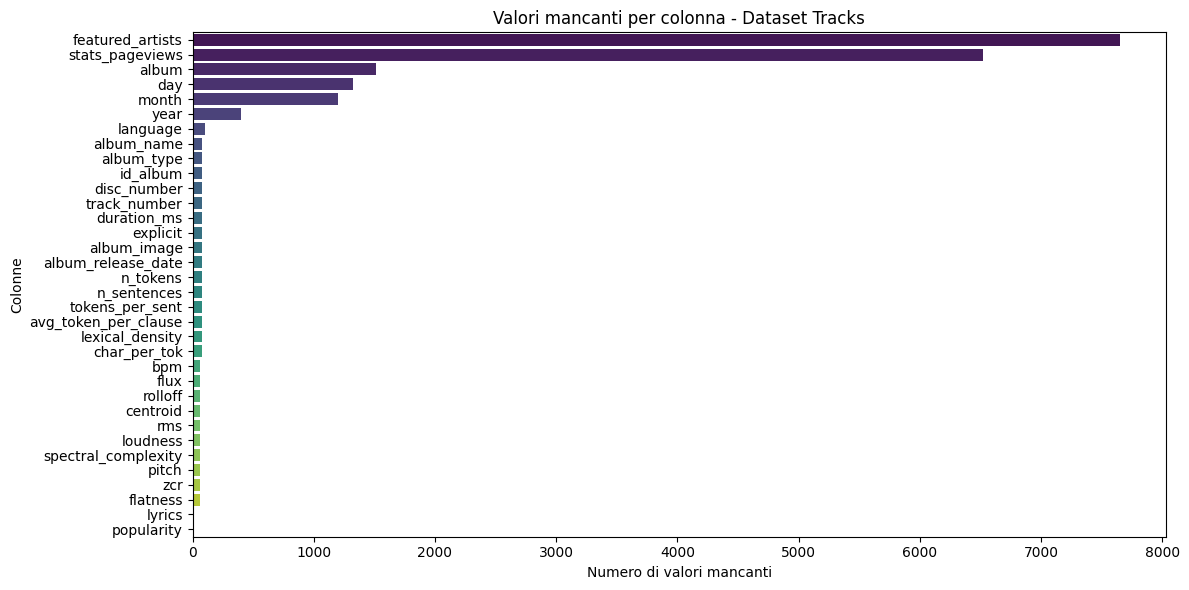

In [27]:
# Visualizzazione valori mancanti
plt.figure(figsize=(12, 6))
missing_data = tracks.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.xlabel('Numero di valori mancanti')
plt.ylabel('Colonne')
plt.title('Valori mancanti per colonna - Dataset Tracks')
plt.tight_layout()
plt.show()

In [28]:
# Analisi dei valori mancanti
print("Valori mancanti per colonna:")
missing_values = tracks.isnull().sum()
missing_percentage = (missing_values / len(tracks)) * 100
missing_df = pd.DataFrame({
    'Colonna': missing_values.index,
    'Valori Mancanti': missing_values.values,
    'Percentuale (%)': missing_percentage.values
})
missing_df = missing_df[missing_df['Valori Mancanti'] > 0].sort_values('Valori Mancanti', ascending=False)
print(missing_df.to_string(index=False))

Valori mancanti per colonna:
             Colonna  Valori Mancanti  Percentuale (%)
    featured_artists             7649        68.502597
     stats_pageviews             6524        58.427369
               album             1514        13.559018
                 day             1323        11.848469
               month             1197        10.720043
                year              400         3.582303
            language              105         0.940355
          album_name               78         0.698549
          album_type               78         0.698549
            id_album               78         0.698549
         disc_number               78         0.698549
        track_number               78         0.698549
         duration_ms               78         0.698549
            explicit               78         0.698549
         album_image               78         0.698549
  album_release_date               78         0.698549
            n_tokens               7

In [29]:
# Statistiche descrittive
tracks.describe(include='all')

,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,swear_IT,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
count,11166,11166,11166,11166,3517,11166,11061,9652,4.642000e+03,11166.000000,...,11088,11088.000000,11088.000000,1.108800e+04,11088,11164,11088,11088,11163,11166
unique,104,104,11164,10521,1740,104,35,890,NaN,NaN,...,3,NaN,NaN,NaN,2,170,2486,3061,11153,2
top,ART91352277,Mondo Marcio,​sentimi by Madame,Intro,Guè,Mondo Marcio,it,Rimo Da Quando,NaN,NaN,...,album,NaN,NaN,NaN,True,34.0,https://i.scdn.co/image/ab67616d0000b273d6cdd0...,ALB441104,Qua si affacciano di sotto appena usciamo dal ...,False
freq,353,353,2,36,64,353,9352,47,NaN,NaN,...,9353,NaN,NaN,NaN,5629,217,132,48,2,11088
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.699365e+04,2.343006,...,NaN,1.016685,6.859127,2.035293e+05,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.840656e+04,3.704831,...,NaN,0.138903,5.191472,8.825641e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.006000e+03,0.000000,...,NaN,1.000000,1.000000,1.142600e+04,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.642250e+03,0.000000,...,NaN,1.000000,2.000000,1.701310e+05,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.909950e+04,1.000000,...,NaN,1.000000,6.000000,1.966725e+05,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.201175e+04,3.000000,...,NaN,1.000000,10.000000,2.271840e+05,NaN,NaN,NaN,NaN,NaN,NaN
